# Adding External Variables to Our Model

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Gross Domestic Product (GDP) Dataset

In [7]:
macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


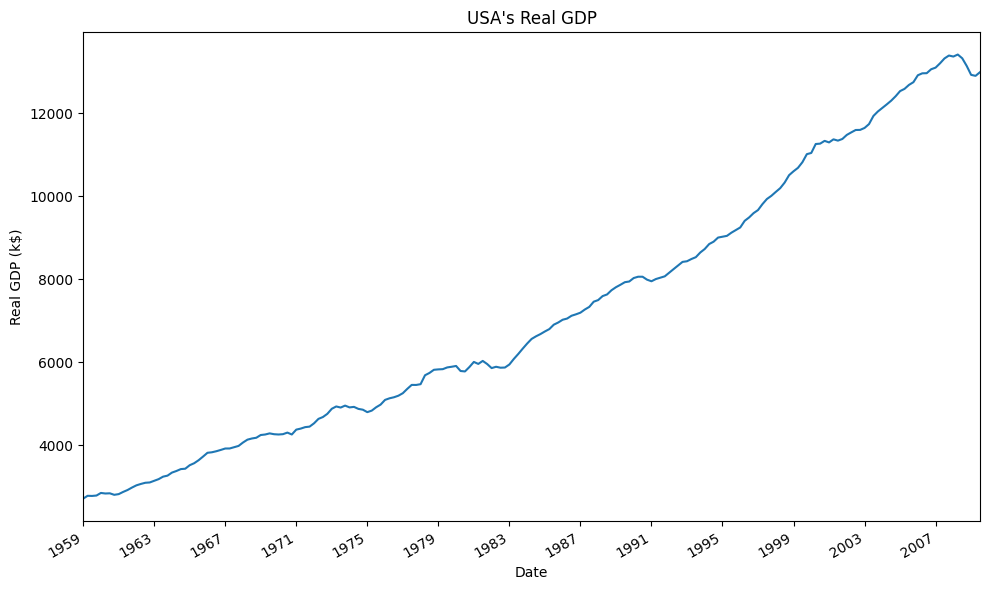

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(macro_econ_data['realgdp'])
ax.set_xlabel('Date')
ax.set_ylabel('Real GDP (k$)')
ax.set_title("USA's Real GDP")

plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))
ax.set_xlim(0, 202) 

fig.autofmt_xdate()
plt.tight_layout()

Real gross domestic product (GDP) of the United States from 1959 to 2009.
The data was collected quarterly and is expressed in thousands of US dollars. Notice the
clear positive trend over the years with no cyclical pattern, suggesting that seasonality
is not present in the series.

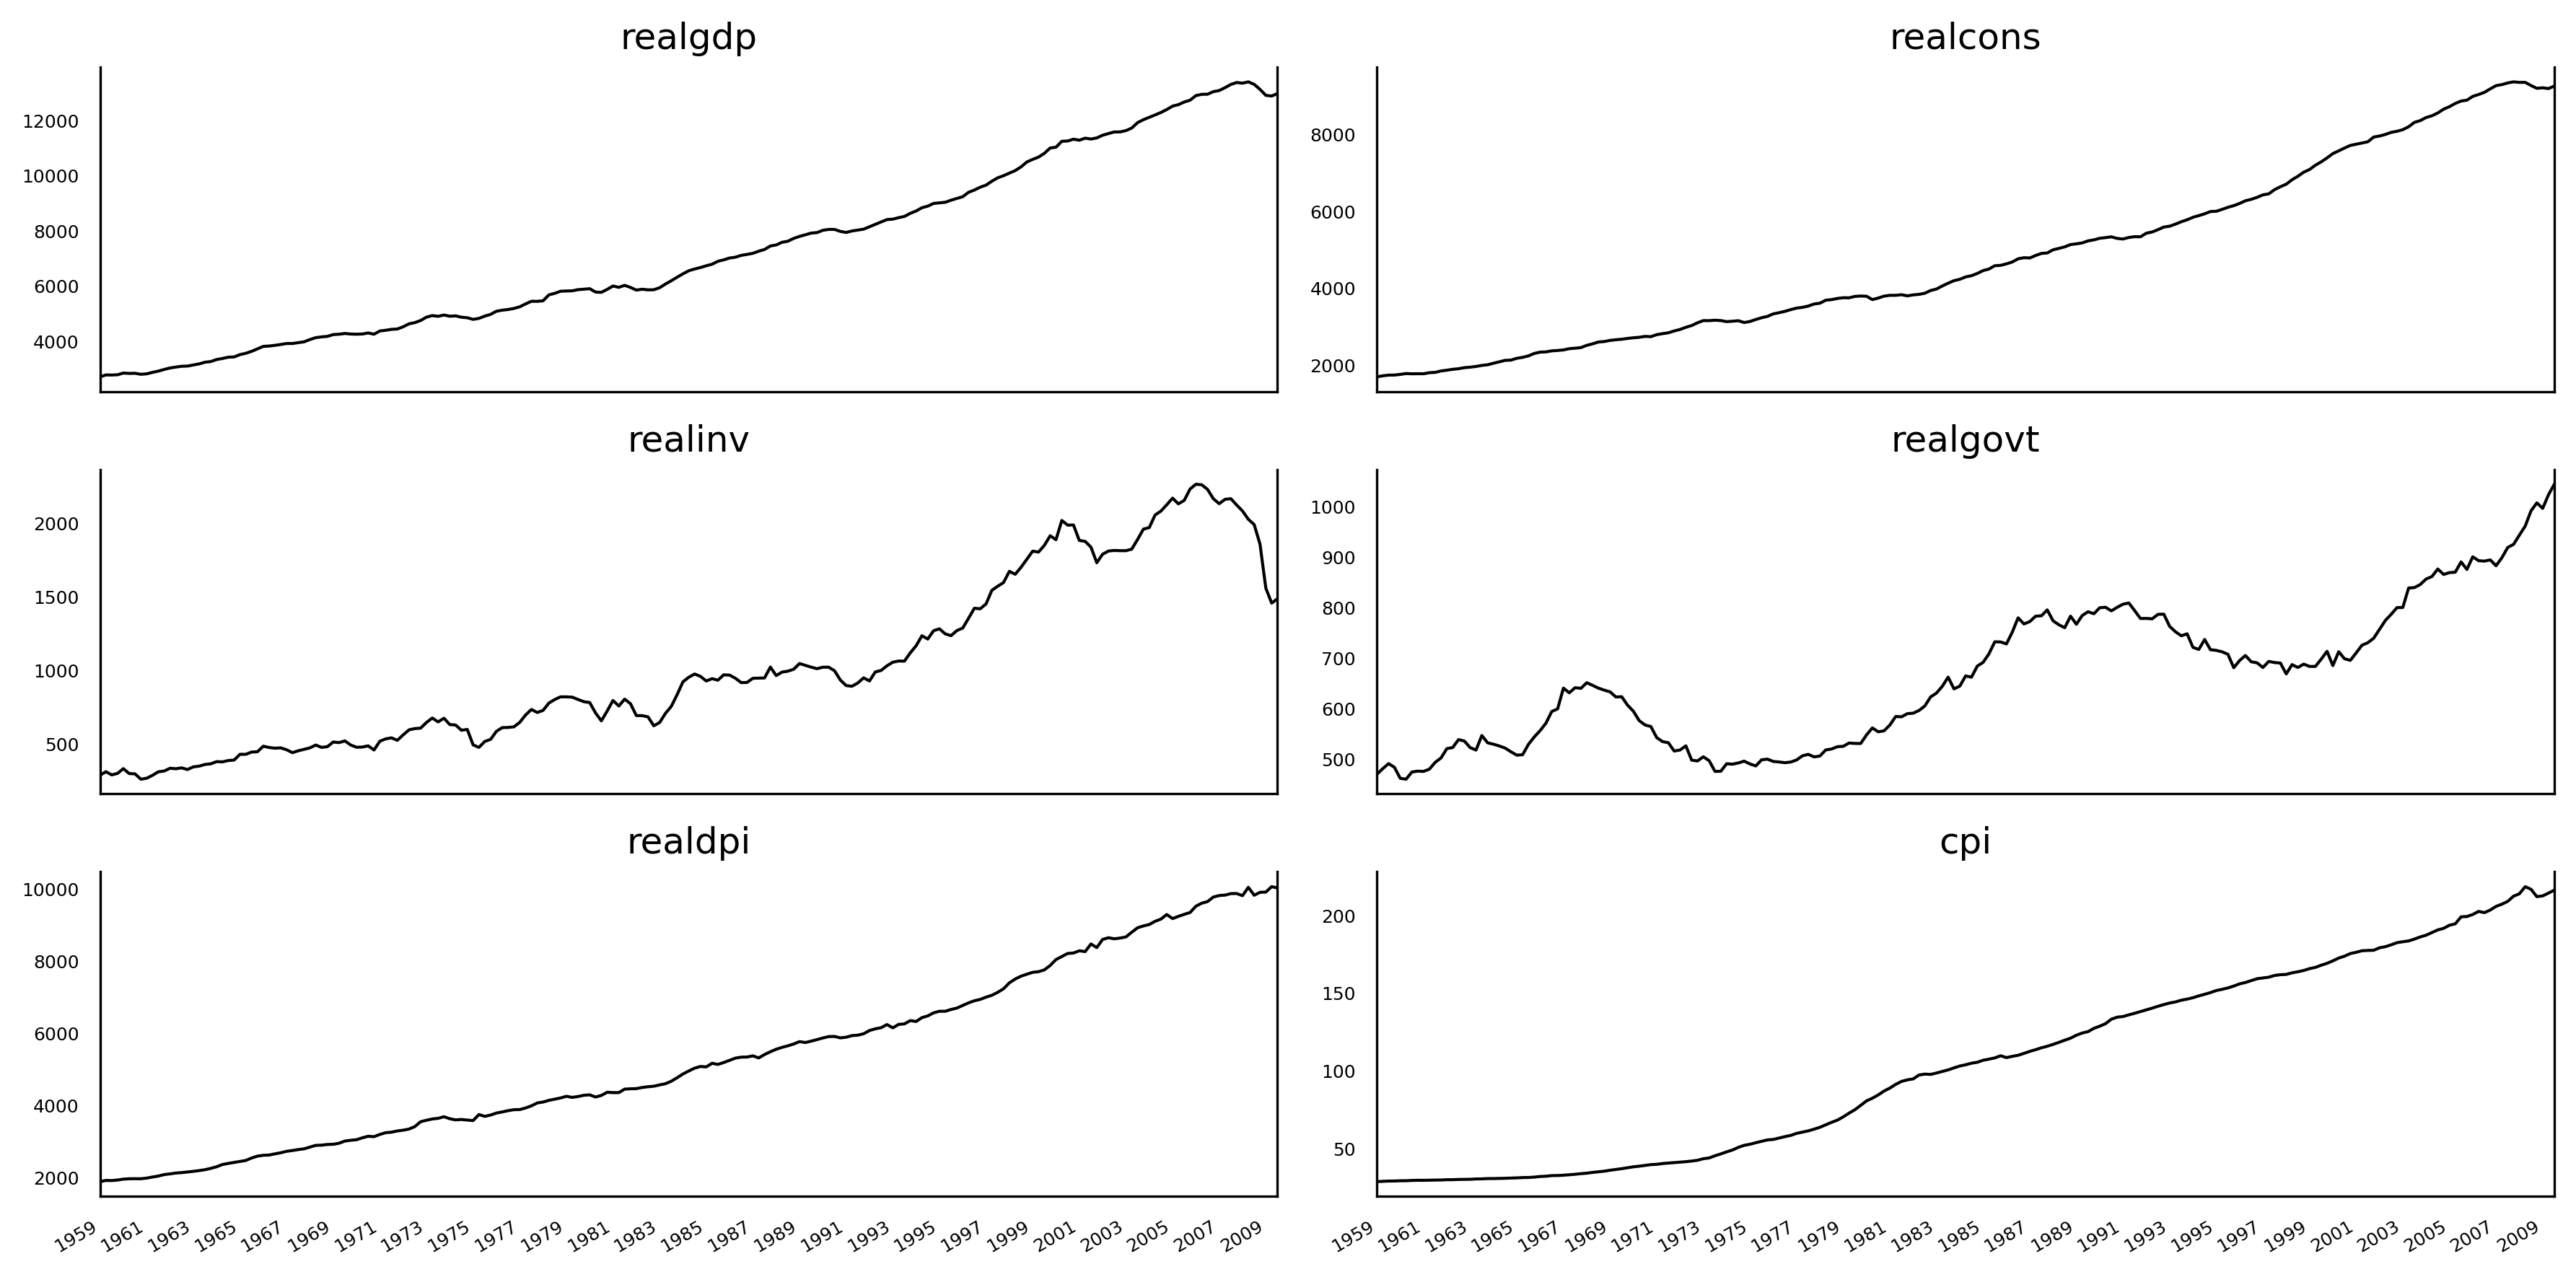

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=300, figsize=(12,6))

for i, ax in enumerate(axes.flatten()[:6]):               # Iterate for six variables
    data = macro_econ_data[macro_econ_data.columns[i+2]]  # Skip the year and quarter columns
    
    ax.plot(data, color='black', linewidth=1)
    ax.set_title(macro_econ_data.columns[i+2])            # Display the variable's name at the top of the plot
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.set_xlim(0, 202)

plt.setp(axes, xticks=np.arange(0, 208, 8), xticklabels=np.arange(1959, 2010, 2))
fig.autofmt_xdate()
plt.tight_layout()

### Description of all variables in the US macroeconomics dataset

| **Variable** | **Description** |
|--------------|-----------------|
| `realgdp`   | Real gross domestic product (the target variable or endogenous variable) |
| `realcons`  | Real personal consumption expenditure |
| `realinv`   | Real gross private domestic investment |
| `realgovt`  | Real federal consumption expenditure and investment |
| `realdpi`   | Real private disposable income |
| `cpi`       | Consumer price index for the end of the quarter |
